In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv('births.csv')
url = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv"
df = pd.read_csv(url)

In [2]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


Total number of US births by year and gender

In [3]:
df.pivot_table('births', index='year', columns='gender', aggfunc='sum')
#df.pivot_table('births', index='year', columns='gender') //default mean
#df.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot(kind='bar') //line
#plt.ylabel('total births per year');

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

Average daily births by day of week and decade

In [4]:
#Code to add the decade column 
df['decade'] = 10 * (df['year'] // 10)
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


https://thecleverprogrammer.com/2020/05/08/birth-rate-analysis/
https://www.kaggle.com/code/milanpatra/us-birthsdata-analysis

In [5]:
df['day'].fillna(0, inplace=True) #null values in dataframe is replace by 0

In [6]:
df.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15547.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.221265,9762.293561,1974.544285
std,6.728340,3.449632,15.357008,28552.465810,6.789583
min,1969.000000,1.000000,0.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [7]:
#gausian based outlier filtering
import numpy as np
quartiles = np.percentile(df['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [8]:
df = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
df['day'] = df['day'].astype(int)
df.index = pd.to_datetime(10000 * df.year +
                              100 * df.month +
                              df.day, format='%Y%m%d') #20220313= 20220000+300+13

df['dayofweek'] = df.index.dayofweek

In [9]:
df.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [10]:
mapping = {0: 'Monday', 1: 'Tuesady', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['dayofweek'] = df['dayofweek'].map(mapping)
df.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,Wednesday
1969-01-01,1969,1,1,M,4440,1960,Wednesday
1969-01-02,1969,1,2,F,4454,1960,Thursday
1969-01-02,1969,1,2,M,4548,1960,Thursday
1969-01-03,1969,1,3,F,4548,1960,Friday


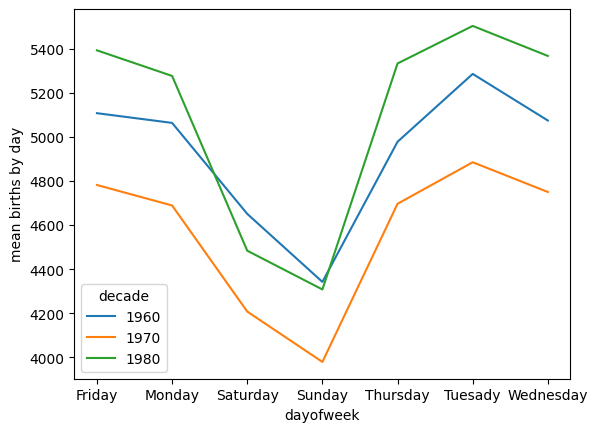

In [12]:
df.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
#plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']) #get current axis and set with labels
plt.ylabel('mean births by day');
plt.show()